In [1]:
spark
import tensorflow as tf

/data/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
import numpy as np
import pandas as pd
import re
import nltk

from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [11]:
df3 = spark.sql('select * from iner.tt_prediction_clusterx3_sinpeaje_PCA_al05')
df3.head()

Row(ruc_emi='10101948671', cod_tip_cpe='01', num_serie='e001', num_cpe='23', n_item='1', cantidad='20.0', detalle='anticorrosivo maestro verde trebol', words=['anticorrosivo', 'maestro', 'verde', 'trebol'], filtered1=['anticorrosivo', 'maestro', 'verde', 'trebol'], filtered=['anticorrosivo', 'maestro', 'verde', 'trebol'], features=SparseVector(5685, {434: 1.0, 1407: 1.0, 3417: 1.0, 3839: 1.0}), prediction=0, pcaFeatures=DenseVector([0.0004, 0.0013]))

In [13]:
dfpandas = df3.toPandas()

In [4]:
model = word2vec.Word2Vec(dfpandas.filtered, size=100, window=20, min_count=200, workers=4)

In [10]:
model.corpus_count

41172

In [35]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [36]:
model.wv['servicio']

array([-0.02764844, -0.2363566 ,  0.36868155, -0.18672697, -0.12665512,
       -0.6012906 , -0.11677849, -0.1840482 ,  0.01327947,  0.04353528,
       -0.13595058,  0.3294206 , -0.23236452, -0.06742603,  0.01509345,
       -0.31724453,  0.30086282,  0.46270564, -0.27402028,  0.25502437,
        0.2114784 , -0.33824936, -0.30241182,  0.10811738,  0.28714883,
        0.31951147, -0.16728416,  0.40127182, -0.06730852, -0.03677722,
       -0.07360478, -0.00614759, -0.11560783, -0.22568879,  0.14104754,
       -0.17047495, -0.21859705,  0.0676071 ,  0.00085963,  0.21882463,
       -0.22753674,  0.04349234, -0.4758175 ,  0.16802378, -0.33130476,
        0.0019739 ,  0.23096748, -0.2427927 ,  0.22996329,  0.2303947 ,
       -0.02135046,  0.07709911,  0.00337624,  0.17427208, -0.03773637,
        0.10856361,  0.27810568,  0.21039939,  0.07848435, -0.14003271,
        0.2206233 , -0.06612097, -0.01255472,  0.14997666,  0.31646746,
        0.2173294 , -0.16804658, -0.13393202,  0.35103598,  0.09

/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


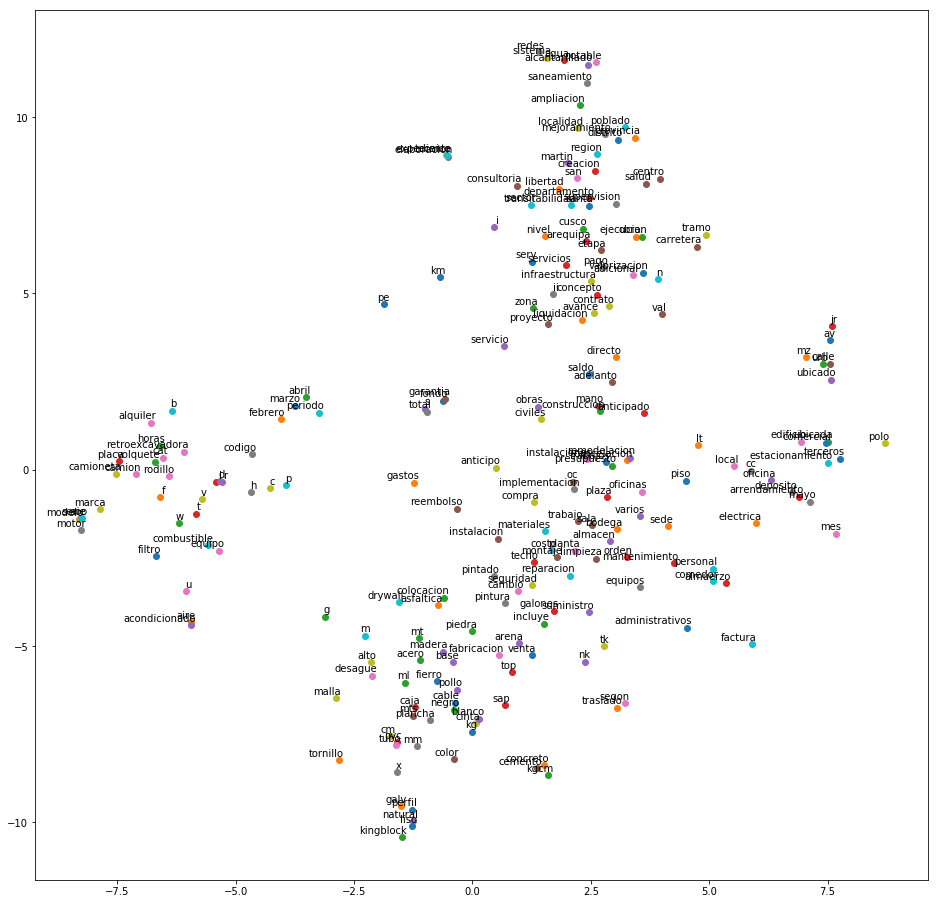

In [37]:
tsne_plot(model)

In [ ]:
model1 = word2vec.Word2Vec(dfpandas.filtered, size=100, window=20, min_count=100, workers=4)
tsne_plot(model1)

In [12]:
df3.count()

41172

In [14]:
dfpandas.columns

Index(['ruc_emi', 'cod_tip_cpe', 'num_serie', 'num_cpe', 'n_item', 'cantidad',
       'detalle', 'words', 'filtered1', 'filtered', 'features', 'prediction',
       'pcaFeatures'],
      dtype='object')

In [52]:
comp1 = []
comp2 = []
for i in range(len(dfpandas)):
    comp1.append(dfpandas.pcaFeatures[i][0])
    comp2.append(dfpandas.pcaFeatures[i][1])

In [55]:
dfcomp = pd.DataFrame({
    'comp1':comp1,
    'comp2':comp2
})

In [57]:
dfpandas['dim1'] = dfcomp['comp1']
dfpandas['dim2'] = dfcomp['comp2']

In [58]:
dfpandas.head()

,ruc_emi,cod_tip_cpe,num_serie,num_cpe,n_item,cantidad,detalle,words,filtered1,filtered,features,prediction,pcaFeatures,dim1,dim2
0,10101948671,01,e001,23,1,20.0,anticorrosivo maestro verde trebol,"[anticorrosivo, maestro, verde, trebol]","[anticorrosivo, maestro, verde, trebol]","[anticorrosivo, maestro, verde, trebol]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.00039611914270033983, 0.0012961445998557395]",0.000396,0.001296
1,10101948671,01,e001,23,2,28.0,esmalte anticorrosivo teckno gris,"[esmalte, anticorrosivo, teckno, gris]","[esmalte, anticorrosivo, teckno, gris]","[esmalte, anticorrosivo, teckno, gris]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.004995098731530736, -0.003767732216087752]",0.004995,-0.003768
2,10101948671,01,e001,22,1,50.0,soldadura de cellacord,"[soldadura, de, cellacord]","[soldadura, de, cellacord]","[soldadura, cellacord]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0008135424620604661, 0.001082299989062752]",0.000814,0.001082
3,10101948671,01,e001,22,2,40.0,soldadura de supercito,"[soldadura, de, supercito]","[soldadura, de, supercito]","[soldadura, supercito]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0010930993699372416, 0.0013241600369542823]",0.001093,0.001324
4,10101948671,01,e001,22,3,40.0,soldadura de supercito,"[soldadura, de, supercito]","[soldadura, de, supercito]","[soldadura, supercito]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0010930993699372416, 0.0013241600369542823]",0.001093,0.001324


Text(0.5,1,'Dim1 vs Dim2 Detalle CPE Construcción')

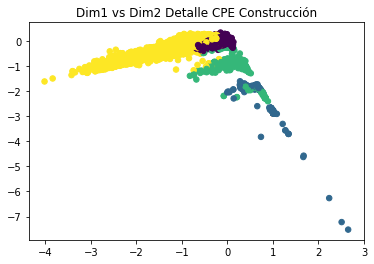

In [60]:
plt.scatter(dfpandas.dim1, dfpandas.dim2,
            c=dfpandas.prediction, s=30)
plt.title('Dim1 vs Dim2 Detalle CPE Construcción')